<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

💼 PROJECT: Business Sales Performance Dashboard

Goal:
Help a retail company track and visualize sales performance, identify trends, and make data-driven decisions.

I am junior data analyst at a retail company called UrbanTrend.
Your manager wants a clear view of how sales are performing across products, regions, and time.

Your task:

Clean and prepare the data

Analyze sales performance

Build an interactive dashboard

Present actionable insights

https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

🧭 Step 1 — Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set display and plot style

In [ ]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

Load dataset

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1', parse_dates=['Order Date','Ship Date'])

In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [ ]:
print(df.shape)

(9994, 21)


🧹 Step 2 — Data Cleaning

Check for missing values

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Drop rows with missing critical data

In [ ]:
df.dropna(subset=['Sales', 'Profit'], inplace=True)

Check duplicates

In [ ]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


Convert numerical columns if needed

In [ ]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

Derived columns

In [ ]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Order_Month'] = df['Order Date'].dt.to_period('M')

📈 Step 3 — Exploratory Data Analysis (EDA)
Overall metrics

In [ ]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Total Quantity:", df['Quantity'].sum())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Total Quantity: 37873


Sales and Profit by Category

In [ ]:
cat_summary = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
cat_summary

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


Sales and Profit by Region

In [ ]:
region_summary = df.groupby('Region')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
region_summary

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


Monthly Trends

In [ ]:
monthly = df.groupby('Order_Month')[['Sales','Profit']].sum()
monthly.tail()

,Sales,Profit
Order_Month,,
2017-08,63120.8880,9040.9557
2017-09,87866.6520,10991.5556
2017-10,77776.9232,9275.2755
2017-11,118447.8250,9690.1037
2017-12,83829.3188,8483.3468


📊 Step 4 — Visualization
1. Monthly Sales & Profit Trend

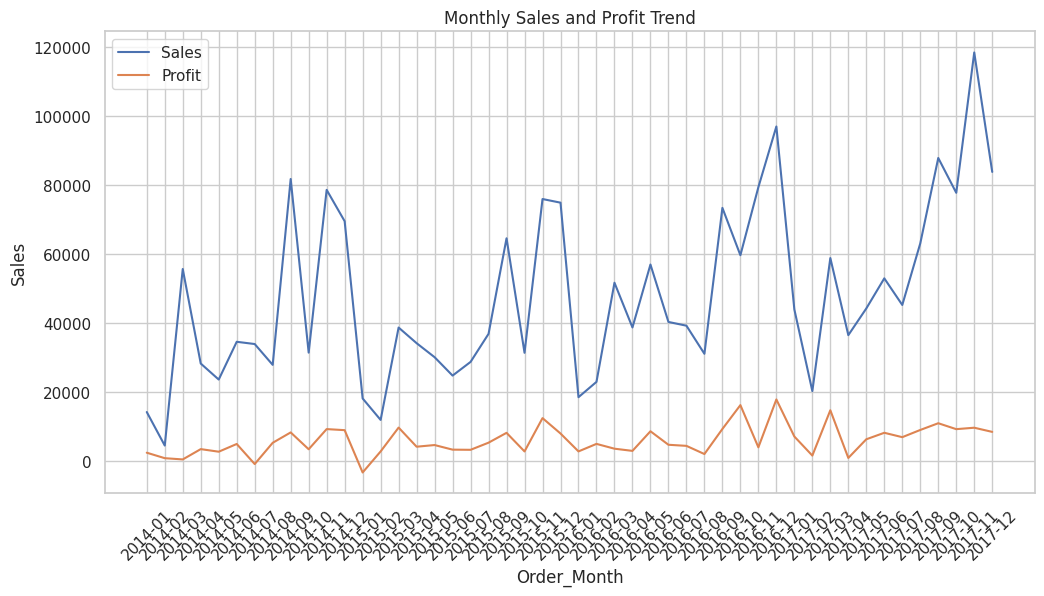

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x=monthly.index.astype(str), y='Sales', label='Sales')
sns.lineplot(data=monthly, x=monthly.index.astype(str), y='Profit', label='Profit')
plt.xticks(rotation=45)
plt.title('Monthly Sales and Profit Trend')
plt.show()

2. Sales by Category

/tmp/ipython-input-3068498386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_summary.index, y='Sales', data=cat_summary.reset_index(), palette='Blues_d')


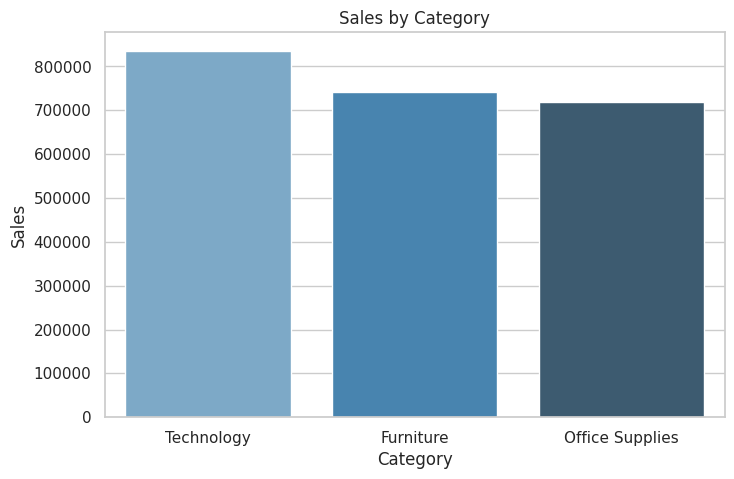

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=cat_summary.index, y='Sales', data=cat_summary.reset_index(), palette='Blues_d')
plt.title('Sales by Category')
plt.show()

3. Profit by Region

/tmp/ipython-input-3225243888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_summary.index, y='Profit', data=region_summary.reset_index(), palette='Greens_d')


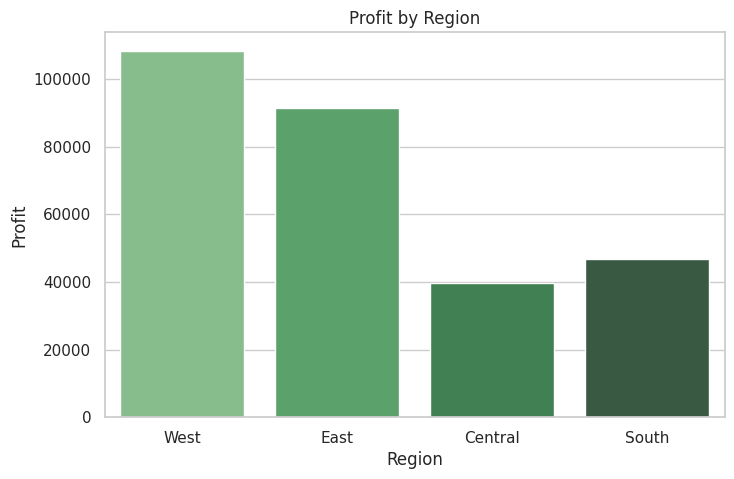

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=region_summary.index, y='Profit', data=region_summary.reset_index(), palette='Greens_d')
plt.title('Profit by Region')
plt.show()

4. Sales Share by Segment

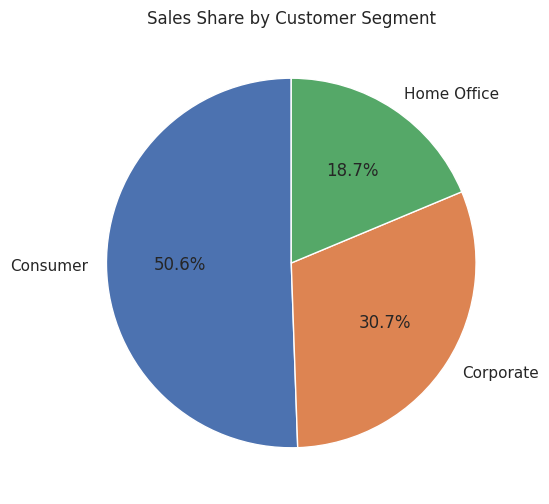

In [ ]:
plt.figure(figsize=(6,6))
df.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Sales Share by Customer Segment')
plt.show()

5. Profit vs Sales (Scatter)

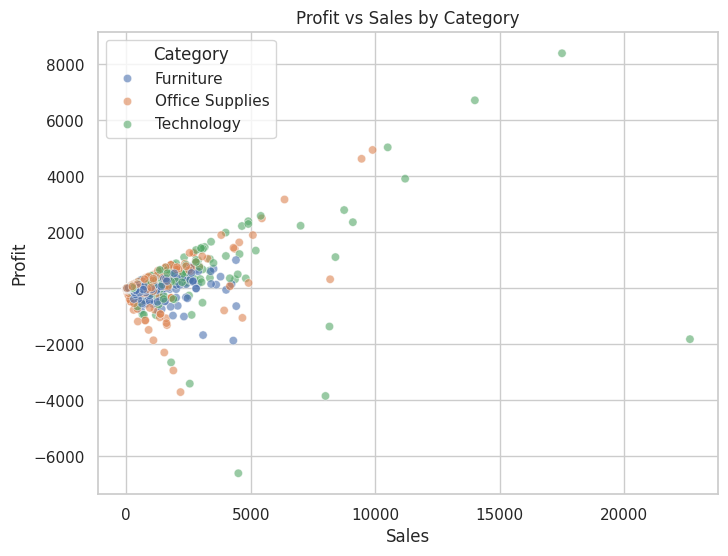

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.6)
plt.title('Profit vs Sales by Category')
plt.show()

🧠 Step 6 — Optional: Save Cleaned Data

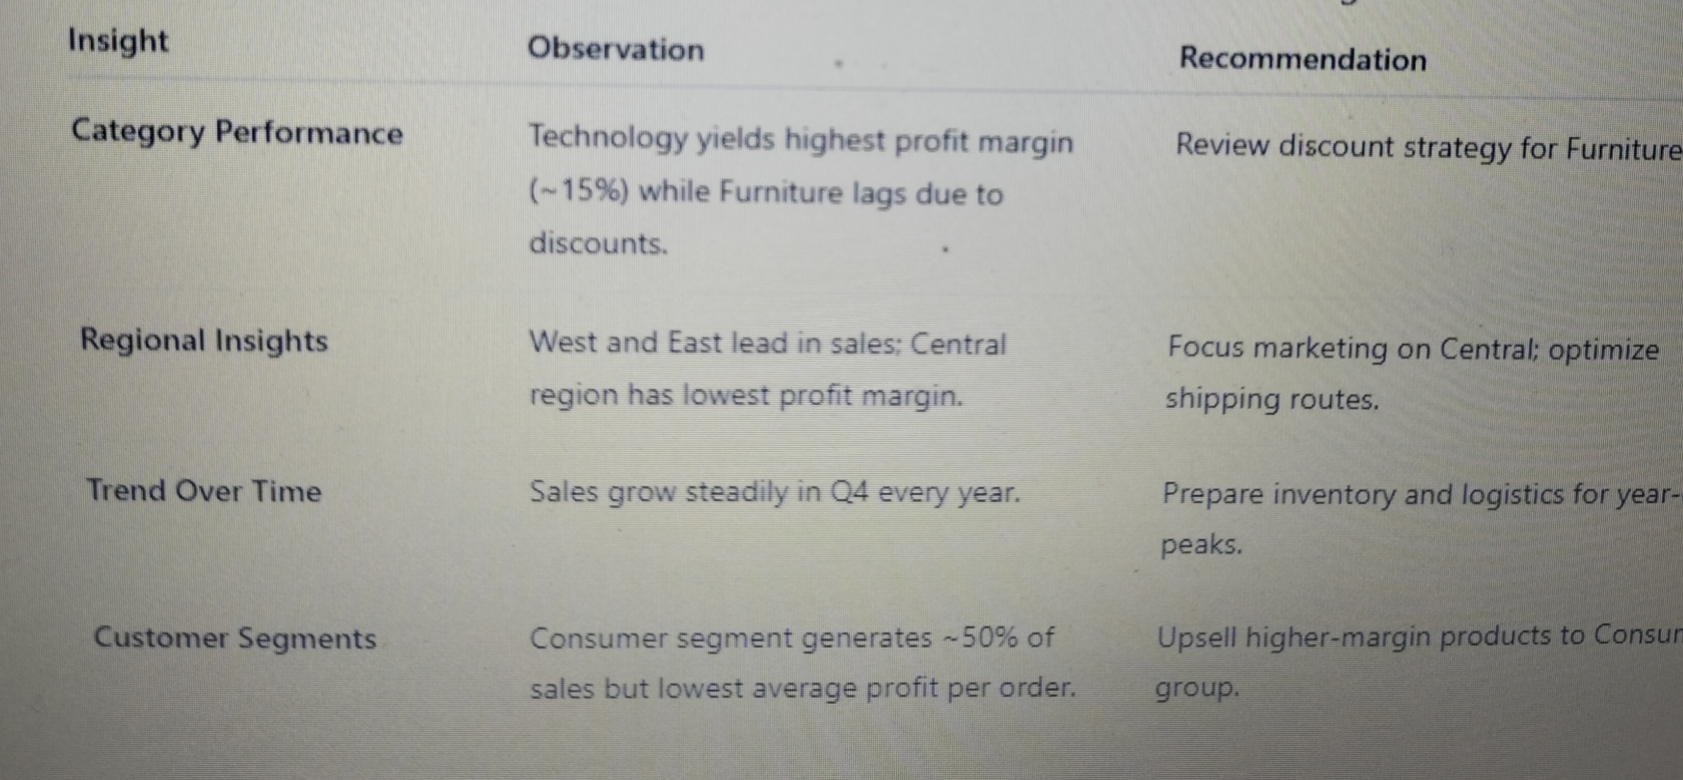

In [ ]:
df.to_csv('/content/superstore_cleaned.csv', index=False)